In [11]:
import torch
from PIL import Image
from transformers import AutoProcessor, GitForCausalLM
from datasets import Dataset
import os

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [19]:
# Load fine-tuned model
model = GitForCausalLM.from_pretrained("./git-finetuned/checkpoint-512/")
# model = GitForCausalLM.from_pretrained("microsoft/git-large")
processor = AutoProcessor.from_pretrained("microsoft/git-large")


model.eval()
print("Model and processor loaded successfully.")

Model and processor loaded successfully.


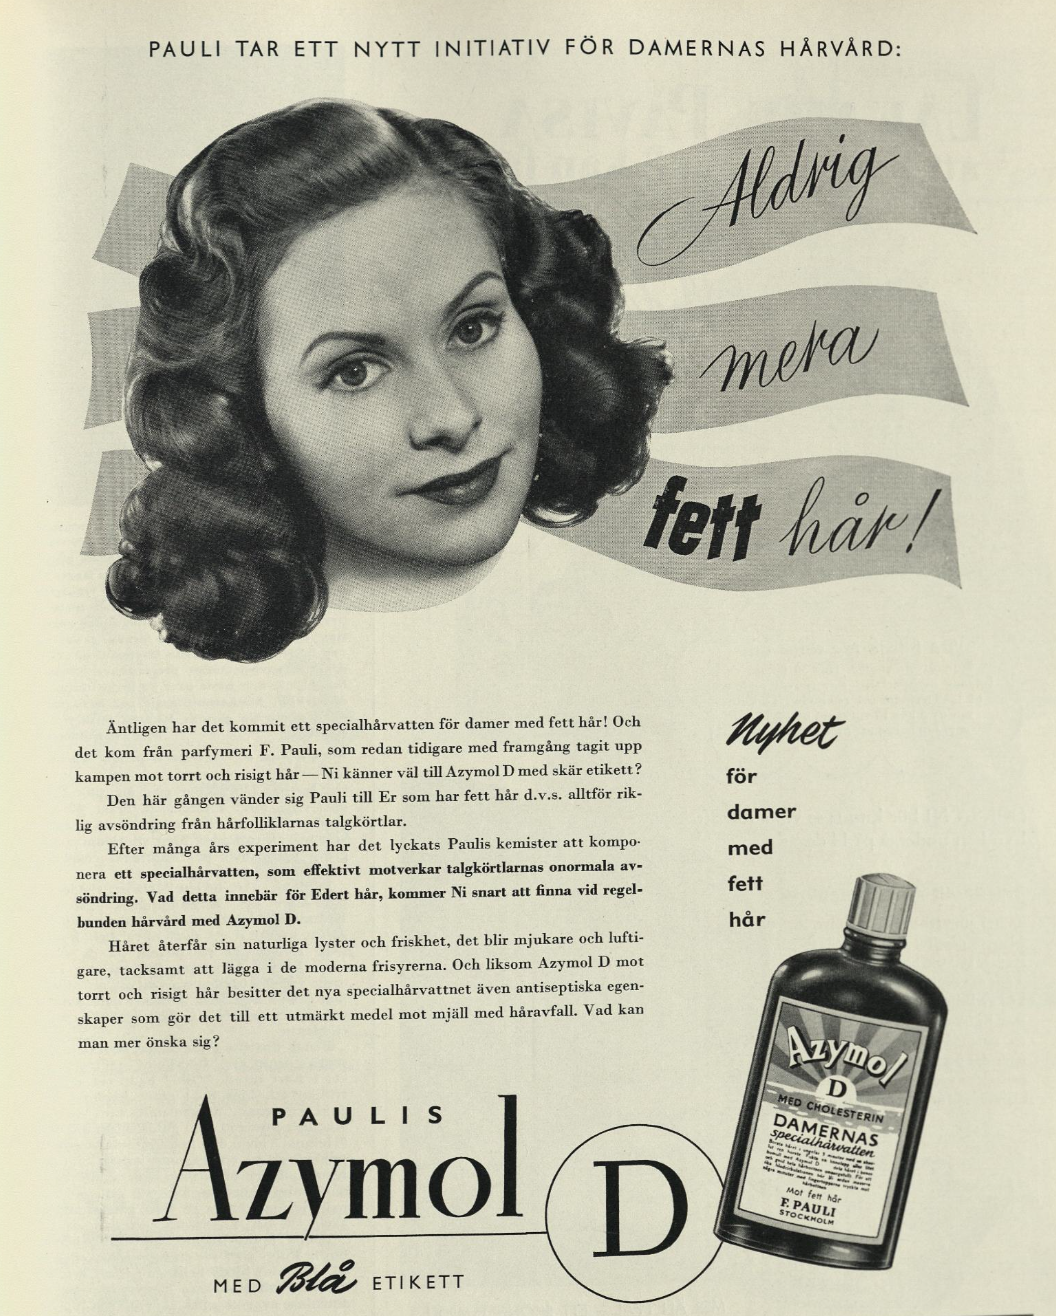

In [21]:
image = Image.open("./test_set_blip/Azymol D BMT49_1-3  pXX.png").convert('RGB')
image

In [28]:
question = "What is the dominant feature of this advert?"
# question1 = "What textual and pictorial elements are used to reinforce the characteristics of the advertised product?"

inputs = processor(images=image, return_tensors="pt")

generated_ids = model.generate(**inputs, min_length=128)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

/home/adam/anaconda3/envs/ml/lib/python3.12/site-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (128) is larger than the maximum possible length (21). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length. Note that `max_length` is set to 21, its default value.
  warnings.warn(


woman s - belted woman s - beauty s in functions a for ability


In [29]:
dir_path = "./test_set_blip/"
for img in os.listdir(dir_path):
    if img.endswith(".png"):
        img_path = os.path.join(dir_path,img)
        image = Image.open(img_path).convert('RGB')
        inputs = processor(images=image, return_tensors="pt")

        generated_ids = model.generate(**inputs, min_length=128)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
        
        with open("./git200.txt", "a") as f:
            f.write(img + ": "+ generated_text + "\n")